# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [2]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats
import matplotlib.pyplot as plt
from numpy import array

import seaborn as sns

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

Answer 1A) The questions is whether race simply ** has ** an effect. It doesn't mention whether it is looking for a negative or positive effect. Because of this, and because the sample size is large, the appropriate test for this is a two tailed test with z-statistics. 

Answer 1B) The central limit theorem does apply because as we approach taking an infinite amount of means of random samples selected from the sample of resumes, the distribution looks more and more normal.

### Get mean, standard deviation, and size of resume sample

In [32]:
black = data[data.race == 'b']
bmean = black.call.mean()
bstd = black.call.std()

white = data[data.race == 'w']
wmean = white.call.mean()
wstd = white.call.std()

### Establish Null Hypothesis, and Start Getting Statistics of Black and White Resume Samples.

Answer 2) 

Null Hypothesis = Race ** DOES NOT ** have an effect on whether you will get a call back or not.

Alternate Hypothesis = Race ** DOES ** have an effect on whether you will get a call back or not.

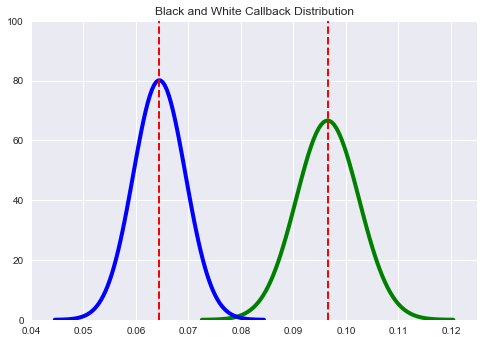

In [33]:
pop_black_std = bstd/black['call'].count()**.5
pop_white_std = wstd/white['call'].count()**.5

white_dist = scipy.stats.norm(wmean, pop_white_std)
black_dist = scipy.stats.norm(bmean, pop_black_std)

def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

wxs, wys = eval_pdf(white_dist)
plt.plot(wxs, wys, label='male', linewidth=4, color='green')
plt.axvline(wxs.mean(), color='r', linestyle='dashed', linewidth=2)

bxs, bys = eval_pdf(black_dist)
plt.plot(bxs, bys, label='female', linewidth=4, color='blue')
plt.title('Black and White Callback Distribution')
plt.axvline(bxs.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axis([0.04, .125, 0, 100])
plt.show()

In [34]:
sample_mean_diff = wmean - bmean
null_hyp_pop_std = (wstd**.5 / white.call.count()**.5)

zscore_from_mean = sample_mean_diff/null_hyp_pop_std
zscore_from_mean

2.9085728008246483

The number of standard deviations away from the mean we have to be to get the black sample mean in a distribution of the population assuming that the null hypothesis is true is 2.9. Since we know that the critical z-value of 95% significance is 1.96 standard deviations away from the mean by looking at a Z-Table, than we know that the probability that getting the black sample mean of the calls returned assuming the null hypothesis is true, is not only less than 5%, but also less than 1%. This means that we should reject the null hypothesis, and come to the conclusion that race ** DOES ** in fact have an effect on whether you will get a call back or not.

### Find confidence interval of population, assuming null hypothesis is true

In [36]:
z = 1.96
conf_int = '{} - {}'.format(wmean - (null_hyp_pop_std*z), wmean + (null_hyp_pop_std*z))
conf_int

'0.07492326015209413 - 0.11809522098327421'

Answer 3A) Confidence Interval = We can be confident that 95% of time we select a random sample fom the true population of means, given our null hypothesis is true, it will be between .074, and .118

Answer 3B) Margin of Error = Our margin of error is about +/- 2.2 percent

Answer 3C) P-Value = The p-value for our null hypothesis is .018%.

Answer 4) Story = If our hypothesis is correct that race, in this case that how black or white sounding your name is on your resume is, has no effect on how likely you will get a call back or not, the probability that getting the average of calls returned for black sounding resumes is less than 1 percent. Given this, we can strongly reject our null  hypothesis, and conclude that race does in fact have an effect on whether or not you will get a call back or not.

Answer 5) There would be no way of knowing this unless we checked the correlation between all of the features of the resume, and the target feature of callback success.